## Using KNN Imputation Technique. Inference using - Accuracy, Classification Report, Confusion Matrix, and ROC AUC Score. - General Pipeline

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("/content/canbrs_dataset.csv")
df.head()

,ID,V1,var2,var3,var4,V5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,Outcome
0,A1,77,2010,w1,m1,509,98,0,Unknown,Unknown,Unknown,Unknown,3,Positive,Negative,Negative,Dead
1,A2,82,2010,w1,w5,501,98,0,Yes,No,No,No,3,Positive,Negative,Negative,Dead
2,A3,42,2011,w1,s3,509,98,0,Yes,No,Yes,Yes,1,Negative,Negative,Negative,Dead
3,A4,72,2012,w1,w5,509,98,0,No,No,No,Yes,1,Negative,Negative,Negative,Dead
4,A5,85,2013,w1,w5,508,98,0,Yes,No,No,No,4,Positive,Positive,Positive,Dead


In [16]:
data = df.copy()

In [17]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data = data.round().astype(int)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(random_state=42) ## Accuracy - 0.91666
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9116666666666666

Classification Report:
               precision    recall  f1-score   support

       Alive       0.78      0.70      0.74       108
        Dead       0.94      0.96      0.95       492

    accuracy                           0.91       600
   macro avg       0.86      0.83      0.84       600
weighted avg       0.91      0.91      0.91       600



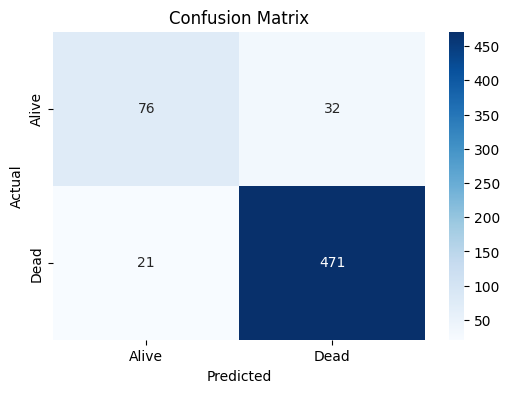

ROC AUC Score: 0.9458182776272207


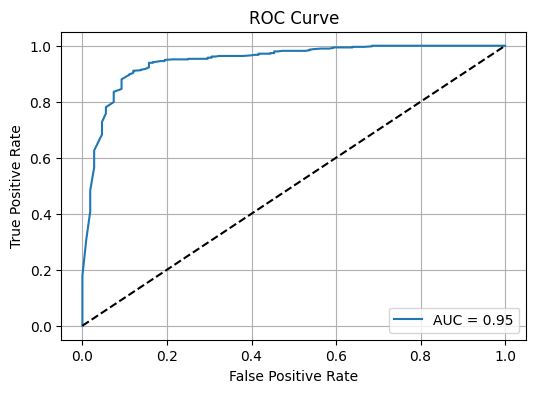

In [19]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Pipeline - Added SMOTE to the General Pipeline.

In [20]:
data = df.copy()

In [21]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data = data.round().astype(int)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [23]:
model = RandomForestClassifier(random_state=42) ## Accuracy - 0.91666
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

       Alive       0.75      0.81      0.78       108
        Dead       0.96      0.94      0.95       492

    accuracy                           0.92       600
   macro avg       0.85      0.87      0.86       600
weighted avg       0.92      0.92      0.92       600



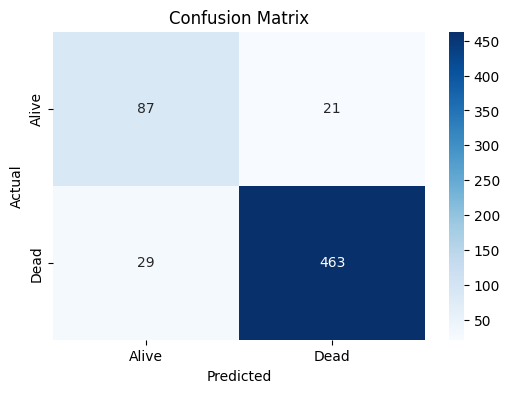

ROC AUC Score: 0.9415744504667269


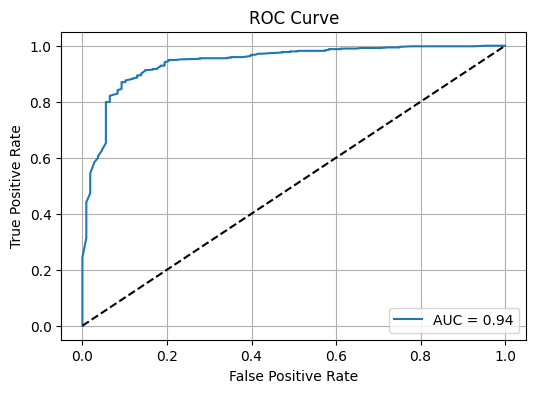

In [24]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Pipeline - Added Balanced RF with General Pipeline

In [25]:
data = df.copy()

In [26]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data = data.round().astype(int)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42)

Accuracy: 0.9133333333333333

Classification Report:
               precision    recall  f1-score   support

       Alive       0.71      0.88      0.79       108
        Dead       0.97      0.92      0.95       492

    accuracy                           0.91       600
   macro avg       0.84      0.90      0.87       600
weighted avg       0.92      0.91      0.92       600



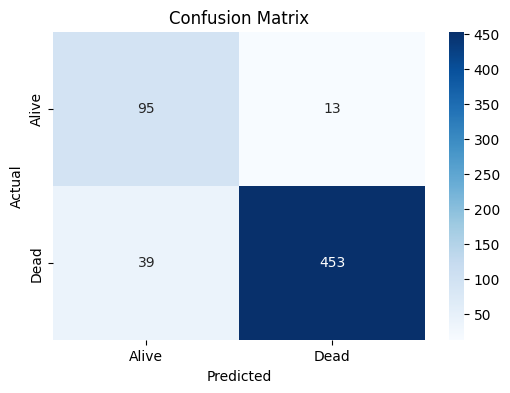

ROC AUC Score: 0.9424777928334839


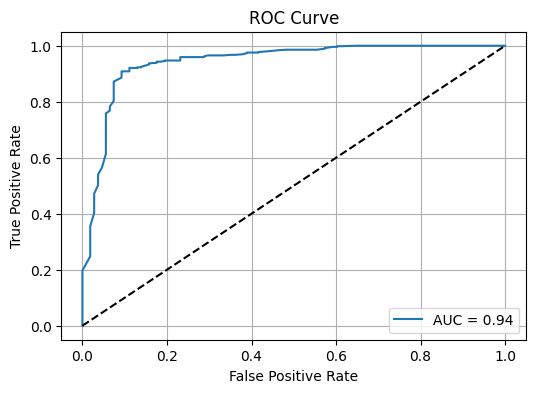

In [28]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Pipeline - Added Balanced RF + SMOTE with General Pipeline

In [29]:
data = df.copy()

In [30]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data = data.round().astype(int)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [32]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42)

Accuracy: 0.915

Classification Report:
               precision    recall  f1-score   support

       Alive       0.76      0.78      0.77       108
        Dead       0.95      0.95      0.95       492

    accuracy                           0.92       600
   macro avg       0.85      0.86      0.86       600
weighted avg       0.92      0.92      0.92       600



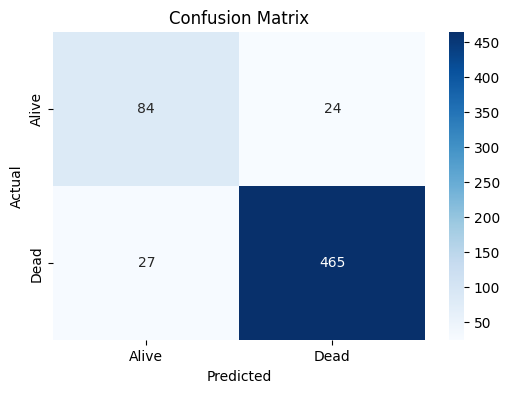

ROC AUC Score: 0.943409364649202


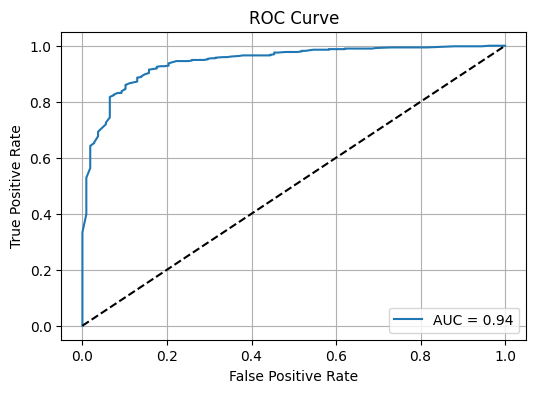

In [33]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Pipeline - Added Cross Validation Method along with General Pipeline

In [34]:
data = df.copy()

In [35]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data = data.round().astype(int)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.91875    0.89791667 0.89375    0.89583333 0.89791667]
Mean Cross-Validation Accuracy: 0.9008333333333333


In [37]:
model = RandomForestClassifier(random_state=42) ## Accuracy - 0.91666
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.90416667 0.89583333 0.89583333 0.89375    0.90416667]
Mean Cross-Validation Accuracy: 0.89875


Accuracy: 0.9116666666666666

Classification Report:
               precision    recall  f1-score   support

       Alive       0.78      0.70      0.74       108
        Dead       0.94      0.96      0.95       492

    accuracy                           0.91       600
   macro avg       0.86      0.83      0.84       600
weighted avg       0.91      0.91      0.91       600



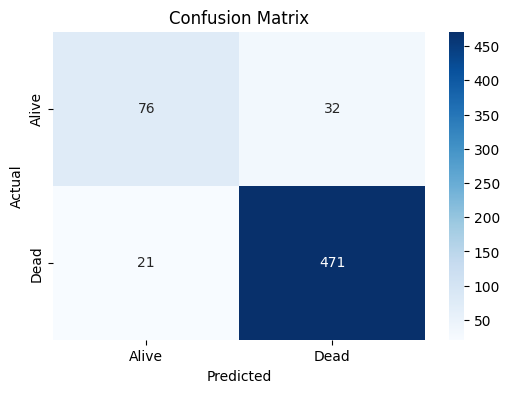

ROC AUC Score: 0.9458182776272207


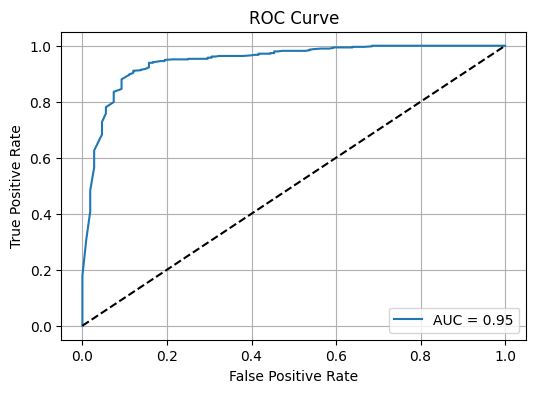

In [39]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Pipeline - Added SMOTE + Balanced RF + CV with General Pipeline

In [55]:
data = df.copy()

In [56]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data = data.round().astype(int)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.91875    0.89791667 0.89375    0.89583333 0.89791667]
Mean Cross-Validation Accuracy: 0.9008333333333333


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [59]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.84924623 0.93836478 0.94465409 0.94465409 0.93836478]
Mean Cross-Validation Accuracy: 0.9230567934009672


In [60]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42)

In [61]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.84924623 0.93836478 0.94465409 0.94465409 0.93836478]
Mean Cross-Validation Accuracy: 0.9230567934009672


Accuracy: 0.915

Classification Report:
               precision    recall  f1-score   support

       Alive       0.76      0.78      0.77       108
        Dead       0.95      0.95      0.95       492

    accuracy                           0.92       600
   macro avg       0.85      0.86      0.86       600
weighted avg       0.92      0.92      0.92       600



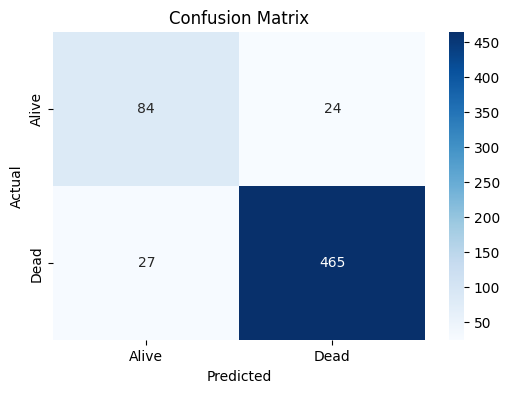

ROC AUC Score: 0.943409364649202


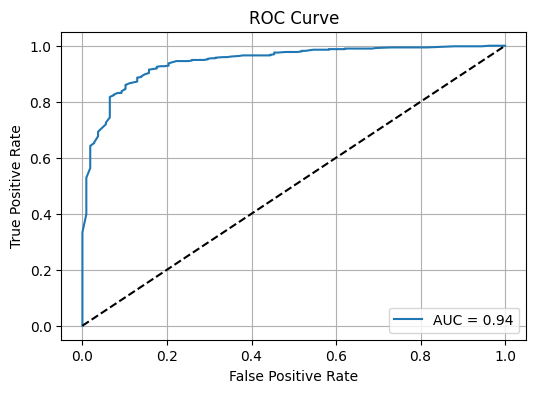

In [62]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")